*English follows Dutch*

*Dutch*

# DEGIRO-analyse voor aandelen en ETFs
Dit Jupyter notebook genereert grafieken voor maandelijkse, en cumulatieve, aankopen en dividenduitkering van aandelen en ETFs.

De onderstaande afbeelding is een deel van mijn rekeningoverzicht waarbij dividend wordt uitgekeerd in USD en wordt omgezet naar EUR. 

![Deel van de DEGIRO portfolio](./img/degiro_dividend_etf.png)

De eerste kolom (Datum), de boekingsdatum, is de datum dat een bedrag bij of af wordt geboekt (de dag van de transactie). De derde kolom (Valutadatum) is voor betalingen de dag dat deze niet meer rentedragend is; voor ontvangsten geldt dat dit de dag is dat deze rentedragend wordt.<sup>[1]</sup>

Op 30 Juni 2021 bevat de portfolio 91 x VWRL.AS (staat niet in rekeningoverzicht) die elke USD 0.5812 aan dividend<sup>[2]</sup> uitkeerd. Dit geeft een totaal van 0.5812 * 91 = 52.89 USD aan dividend. Bij een Custody-account vallen de kosten voor dividendverwerking onder de DEGIRO Corporate Action Kosten<sup>[3]</sup>: 1 EUR + 3% dividend. Hierbij wordt de 1 EUR eerst naar USD omgerekend met de FX van de bijbehorende Valuta Debitering (1.1862):
- DEGIRO Corporate Action Kosten = (1*1.1862) + (52.89*0.03) = 2.77 USD
- Valuta Debitering USD = Dividend - DEGIRO Corporate Action Kosten = 52.89 - 2.77 = 50.12 USD
- Valuta Debitering<sup>[4]</sup> EUR = Valuta Debitering USD * FX = 50.12 * (1 / 1.1862) = 42.25 EUR

De EUR --> USD FX = 1.1862; dus USD --> EUR FX = 1/1.182.
    
*English*

# DEGIRO analysis for stocks and ETFs
This Jupyter notebook generates graphs for monthly, and cumulative, purchases and dividend distributions for stocks and ETFs.

The image below shows part of my account statement where dividend payments are in USD and exchanged to EUR.

![Deel van de DEGIRO portfolio](./img/degiro_dividend_etf.png)

The first column (Datum), the booking date, is de date an amount is written of (the day of the transaction). The third column (Valutadatum) is for payments the day that this is nolonger interest-bearing; for receipts this date implies that the security becomes interest-bearing. <sup>[1]</sup>

On June 20th 2021, the portfolio contained 91 x VWRL.AS (not listed in the attached account statement) which pays out USD 0.5821 in dividends per ETF. This gives as total dividend of 0.5812 * 91 = 52.89 USD. At a Custody-account, costs of dividend processing fall under DEGIRO Corporate Action Kosten<sup>[3]</sup>: 1 EUR + 3% dividend. The 1 EUR first needs to be converted to USD using the FX at the corresponding Valuta Debitering (1.1862):
- DEGIRO Corporate Action Kosten = (1 * 1.1862) + (52.89*0.03) = 2.77 USD. 
- Valuta Debitering USD = Dividend - DEGIRO Corporate Action Kosten = 52.89 - 2.77 = 50.12 USD
- Valuta Debitering<sup>[4]</sup> EUR = Valuta Debitering USD * FX = 50.12 * (1 / 1.1862) = 42.25 EUR

The EUR --> USD FX = 1.186; thus USD --> EUR FX = 1/1.182.

<sup>[1]</sup>: https://nl.wikipedia.org/wiki/Valutering<br />
<sup>[2]</sup>: https://www.vanguardinvestor.co.uk/investments/vanguard-ftse-all-world-ucits-etf-usd-distributing/distributions<br />
<sup>[3]:</sup> https://www.degiro.nl/helpdesk/sites/nl/files/2021-06/Tarievenoverzicht_CUSTODY.pdf<br />
<sup>[4]:</sup> [NL] Dit zou Valuta *Creditering* moeten zijn: "Wanneer er een valutaconversie plaatsvindt in uw account, ziet u de vermeldingen Valuta Debitering en Valuta Creditering in uw rekeningoverzicht." volgens https://www.degiro.nl/helpdesk/geld-overboeken/hoe-kan-ik-producten-verhandelen-die-vreemde-valuta-zijn-genoteerd. [EN] This should be Valuta *Creditering*: If a currency conversion takes place in the account, you will be see entries of Valuta Debitering and Valuta Creditering in the account statement. https://www.degiro.nl/helpdesk/tarieven/transactiekosten/zijn-er-kosten-verbonden-voor-het-handelen-een-vreemde-valuta



In [2]:
from src.functions import get_quantity_and_value_from_description,\
    read_account_overview,\
    get_start_datetime,\
    get_historical_stock_price,\
    dividends
from src.plots import plot_dividend,\
    plot_transactions,\
    plot_cumulative_transaction_value_and_current_value
from datetime import datetime

In [4]:
# Load account statement (.csv file) into dataframe
df_account = read_account_overview('Account.csv')

# It is not straightforward to extract the paid out dividends in the base currency 
# and accounting for any potential DEGIRO Corporate Action Kosten
df_dividends = dividends(df_account)

# Define product name and ticker symbols as dictionary. 
# Note: Compared to online overview, product names in excel/csv exports are i) capped and ii) capitalized.
products = {
    'Vanguard FTSE All-World UCITS ETF': 'VWRL.AS',
}

# Define current datetime as YYYY-MM-DD
current_datetime = datetime.now().strftime('%Y-%m-%d')

# Define base currency
base_currency = 'EUR'

Loop over each product defined in products dictionary:
- Extract the number of purchased shares (Transaction Quantity) and the price (Transaction Value)
- Group transactions per MM-YYYY
- Calculate the cumulative number of shares and the total value
- Extract dividends from overview

/Users/jurnheinen/Python/degiro_analyser/src/plots.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(date, rotation=45, ha='right')


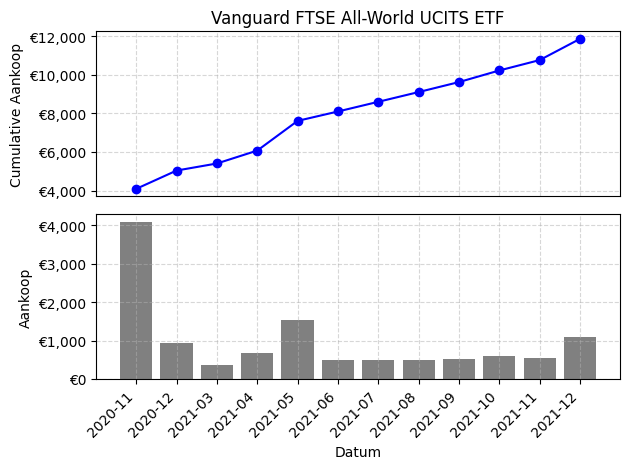

/Users/jurnheinen/Python/degiro_analyser/src/plots.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(date, rotation=45, ha='right')


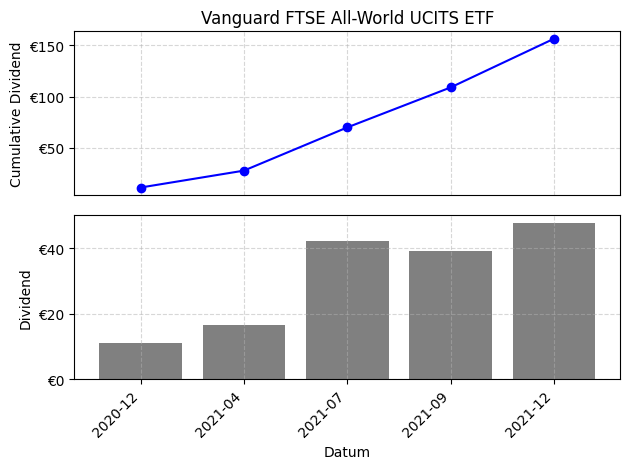

In [ ]:
for product, ticker in products.items():
    # Get only records of pre-defined product and the number of purchasing (Koop)
    mask1 = df_account['Product'].str.contains(product.upper())
    mask2 = df_account['Omschrijving'].str.contains('Koop')
    df_transactions = df_account[(mask1) & (mask2)].copy()

    # product specific metrics such as starting date of buying and currency
    start_date_product = df_transactions['Datum'].min()
    currency = df_transactions['Mutatie_Valuta'].values[0]
    
    # Get the quantity and value of each transaction
    df_transactions[['Transaction_Quantity', 'Transaction_Value']] = df_transactions['Omschrijving'].apply(lambda x: get_quantity_and_value_from_description(x)).tolist()

    # Calculate the total value of each transaction (quantity * value)
    df_transactions['Transaction_Total'] = df_transactions['Transaction_Quantity'] * df_transactions['Transaction_Value']
    
    # Group all transactions by month and calculate the cumulative sum
    columns = ['Transaction_Quantity', 'Transaction_Value', 'Transaction_Total']
    df_transactions = df_transactions.groupby('Datum_Year_Month', as_index=False)[columns].sum()

    # Calculate the cumulative sum of the transaction quantity, total and value
    df_transactions['Transaction_Quantity_Cum'] = df_transactions['Transaction_Quantity'].cumsum(axis=0)
    df_transactions['Transaction_Total_Cum'] = df_transactions['Transaction_Total'].cumsum(axis=0)

    plot_transactions(product,
                    df_transactions['Datum_Year_Month'],
                    df_transactions['Transaction_Total'],
                    df_transactions['Transaction_Total_Cum'],
                    currency)

    # =========================
    # Dividends
    # =========================
    # Paidout dividends considering DEGIRO Corporate Action Kosten and FX (in any)
    dividend = df_dividends[df_dividends['Product'].str.contains(product.upper())]

    # Check if there are any dividends (not all stockers bring out dividends, some etf's are accumulating)
    if dividend.empty:
        print(f'No dividend found for {product}')
    else:
        dividend['Valuta Creditering calc_cum'] = dividend['Valuta Creditering calc'].cumsum(axis=0)
        currency = 'EUR'
        
        plot_dividend(product,
                    dividend['Datum_Year_Month'],
                    dividend['Valuta Creditering calc'],
                    dividend['Valuta Creditering calc_cum'],
                    base_currency)
        
    # The start datetime is the date of the first purchase (minimum date)
    start_datetime = get_start_datetime(start_date_product)

    # Get monthly stock prices in the same months as the transactions
    df_stock_price = get_historical_stock_price(ticker, start_datetime, current_datetime, '1mo')
    df_stock_price = df_stock_price[df_stock_price['Datum_Year_Month'].isin(df_transactions['Datum_Year_Month'])]

    # Add stock prices to transactions for comparison
    df_transactions['Historical_Close'] = df_stock_price['Close'].values
    df_transactions['Stock_Value_Cum'] = df_transactions['Transaction_Quantity_Cum'] * df_transactions['Historical_Close']
    
    plot_cumulative_transaction_value_and_current_value(
        product,
        df_transactions['Datum_Year_Month'],
        df_transactions['Transaction_Total_Cum'],
        df_transactions['Stock_Value_Cum'],
        currency)
    